In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from DecisionMTree import DecisionMTree





In [92]:
#read and import the data 
df = pd.read_csv('/Users/homayounzohdi/Desktop/MushroomDataset/secondary_data.csv',  sep=';')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [94]:
df.shape

(61069, 21)

In [95]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [96]:
df.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [97]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [98]:
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

In [99]:
df.count()

class                   61069
cap-diameter            61069
cap-shape               61069
cap-surface             46949
cap-color               61069
does-bruise-or-bleed    61069
gill-attachment         51185
gill-spacing            36006
gill-color              61069
stem-height             61069
stem-width              61069
stem-root                9531
stem-surface            22945
stem-color              61069
veil-type                3177
veil-color               7413
has-ring                61069
ring-type               58598
spore-print-color        6354
habitat                 61069
season                  61069
dtype: int64

In [100]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [101]:
df[df.duplicated()]


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
9863,p,1.14,x,g,w,f,a,d,w,3.13,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
12978,p,0.72,x,g,y,f,NaN,NaN,y,3.51,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
56526,p,4.27,o,s,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
56533,p,4.29,o,t,w,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
56576,p,4.59,o,s,w,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,p,2.94,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58239,p,3.30,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58241,p,3.13,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,w
58242,p,2.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u


# Distribution of the target

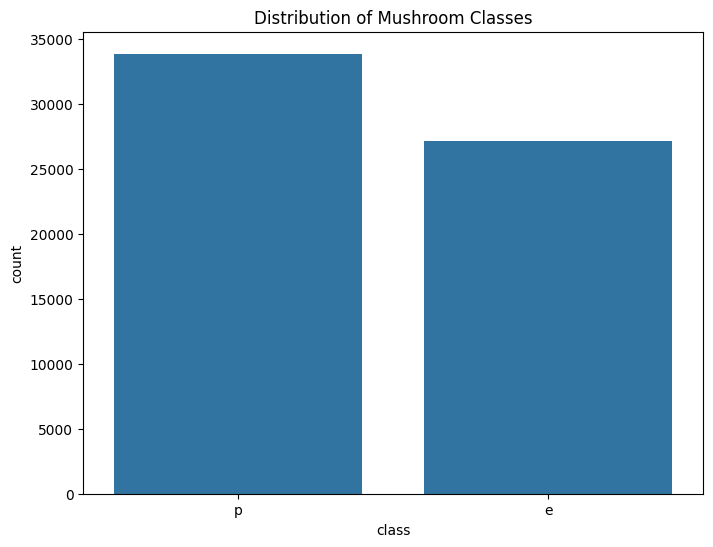

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes')
plt.show()

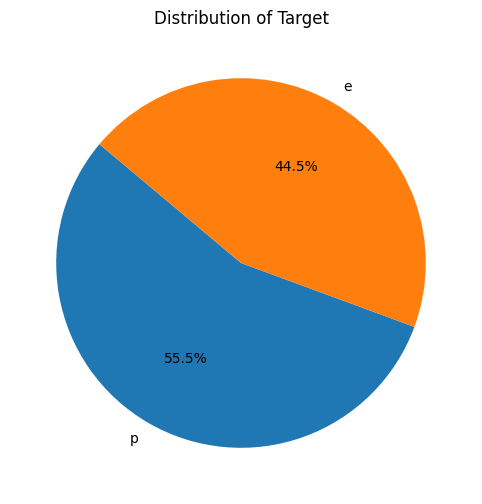

In [103]:
value_counts = df['class'].value_counts()
percentages = 100 * value_counts / len(df)

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target')
plt.show()

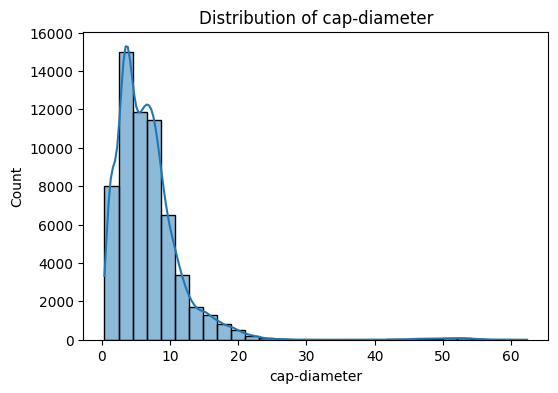

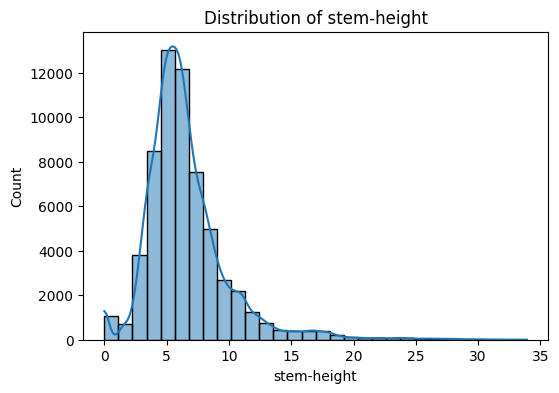

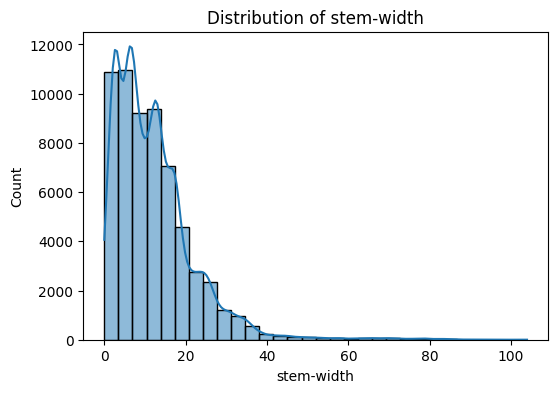

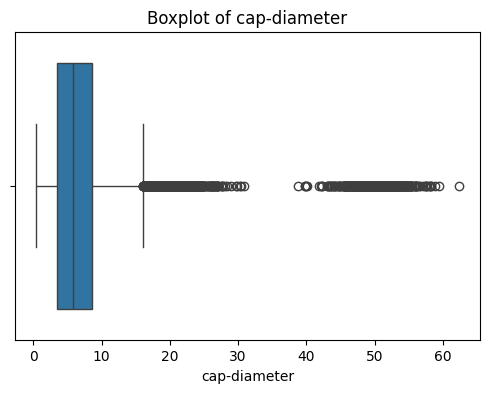

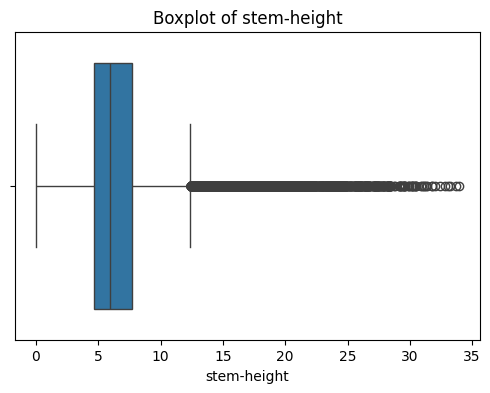

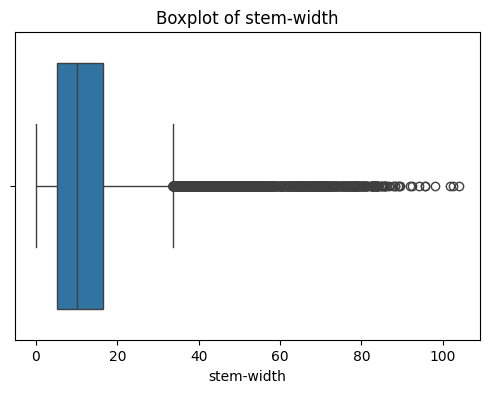

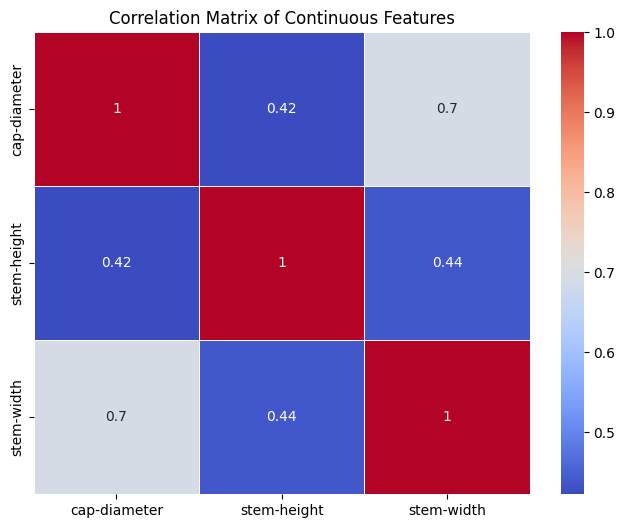

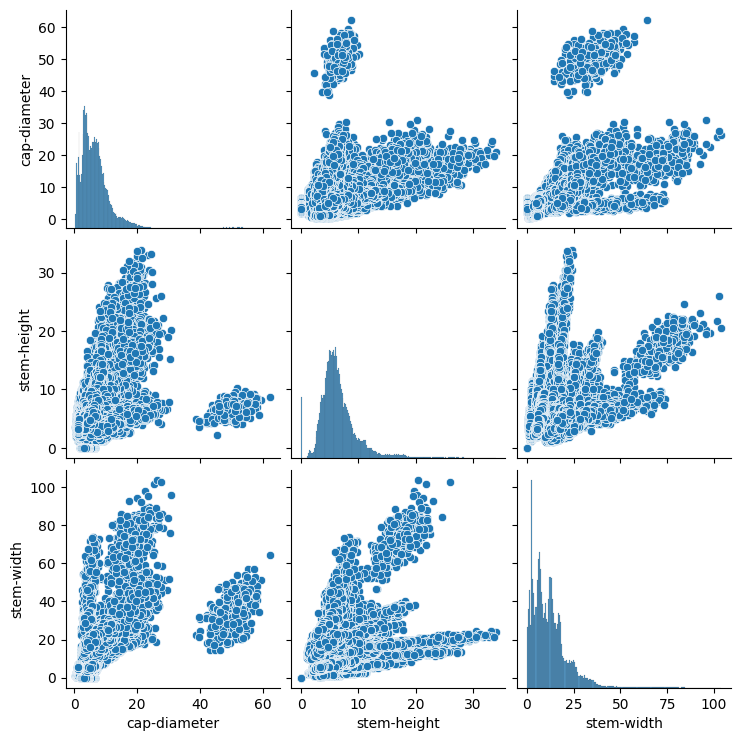

In [104]:
categorical_cols = df.select_dtypes(include=['int64']).columns

for col in categorical_cols:
    if col != 'class':  # Exclude target variable
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.show()

#Distribution of Continuous Variables (Histograms)
continuous_cols = df.select_dtypes(include=['float64']).columns

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box Plot for Continuous Variables (to detect outliers)
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation Matrix (for continuous variables)
corr_matrix = df[continuous_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.show()

#Pairplot to observe pairwise relationships (optional, takes time on large datasets)
sns.pairplot(df[continuous_cols])
plt.show()

#Categorical Features vs Target (Class)
for col in categorical_cols:
    if col != 'class':  # Exclude target variable
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='class')
        plt.title(f'{col} vs Class')
        plt.show()



## handling missing values 

## canclulate the percentage of missing values:

In [105]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Print the percentage of missing values
print(missing_percentage)

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64


In [106]:
# Set threshold (for example, 30%)
threshold = 45

# Drop columns with more than 30% missing values
df_cleaned = df.loc[:, missing_percentage < threshold]

# Print the remaining columns after dropping
print("Remaining columns after dropping:")
print(df_cleaned.columns)

Remaining columns after dropping:
Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')


In [107]:
# For categorical columns with missing values, replace with mode
categorical_columns = ['cap-surface', 'gill-attachment', 'gill-spacing', 'ring-type']
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

/var/folders/s1/gd6sv1c102jcsbgmb93p95s00000gn/T/ipykernel_796/1830463618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


In [108]:
df_cleaned.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [109]:
df_cleaned.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [110]:
df_cleaned.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

## handling catagorical columns  

In [111]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
                       'gill-attachment', 'gill-spacing', 'gill-color', 
                       'stem-color', 'has-ring', 'ring-type', 
                       'habitat', 'season']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

/var/folders/s1/gd6sv1c102jcsbgmb93p95s00000gn/T/ipykernel_796/3040236154.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
/var/folders/s1/gd6sv1c102jcsbgmb93p95s00000gn/T/ipykernel_796/3040236154.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
/var/folders/s1/gd6sv1c102jcsbgmb93p95s00000gn/T/ipykernel_796/3040236154.py:14: SettingWithCopyWarning: 
A value is trying to be se

# handling continues variables/floats: 


In [112]:
from sklearn.preprocessing import StandardScaler

# List of continuous columns
continuous_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to continuous columns
df_cleaned[continuous_columns] = scaler.fit_transform(df_cleaned[continuous_columns])

/var/folders/s1/gd6sv1c102jcsbgmb93p95s00000gn/T/ipykernel_796/101890715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[continuous_columns] = scaler.fit_transform(df_cleaned[continuous_columns])


In [113]:
df_cleaned.dtypes

class                     int64
cap-diameter            float64
cap-shape                 int64
cap-surface               int64
cap-color                 int64
does-bruise-or-bleed      int64
gill-attachment           int64
gill-spacing              int64
gill-color                int64
stem-height             float64
stem-width              float64
stem-color                int64
has-ring                  int64
ring-type                 int64
habitat                   int64
season                    int64
dtype: object

In [114]:
df_cleaned.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

## HELPER FUNCTIONS

In [115]:
def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy


In [116]:
def confusion_matrix(y_true, y_pred):
    # Unique labels in the dataset (for binary classification, it's usually [0, 1])
    labels = np.unique(y_true)
    
    # Initialize the confusion matrix as a 2x2 matrix filled with zeros
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    
    # Iterate over true and predicted labels and populate the confusion matrix
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix


In [117]:
# Separate features (X) and target (y)
X = df_cleaned.drop('class', axis=1)  # Features (drop the target column)
y = df_cleaned['class']    

In [118]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Depth: 5, Criterion: entropy, Test Accuracy: 71.24%, Zero-One Loss: 0.29, Training Error: 0.29


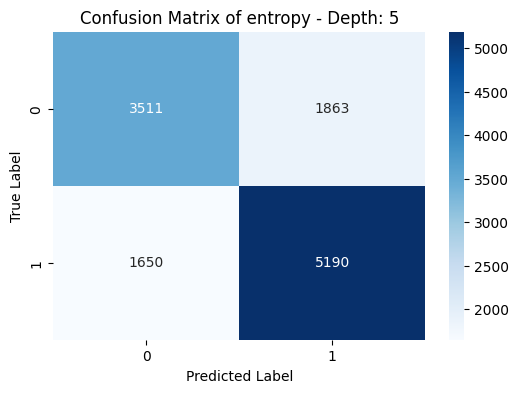

Depth: 10, Criterion: entropy, Test Accuracy: 91.04%, Zero-One Loss: 0.09, Training Error: 0.08


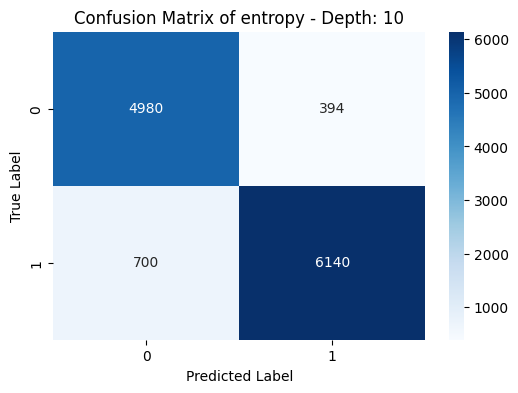

Depth: 5, Criterion: gini, Test Accuracy: 73.90%, Zero-One Loss: 0.26, Training Error: 0.26


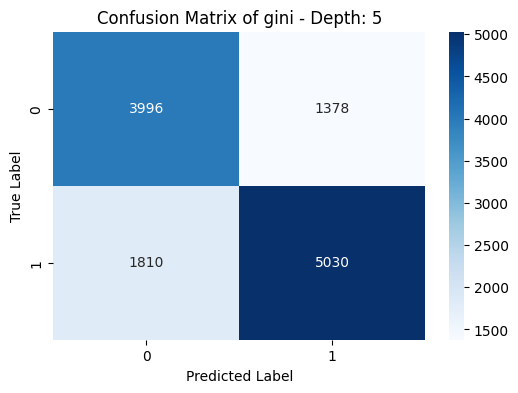

Depth: 10, Criterion: gini, Test Accuracy: 93.26%, Zero-One Loss: 0.07, Training Error: 0.06


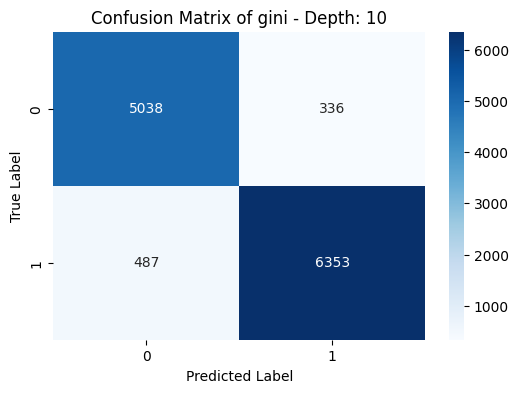

  Criterion  Max Depth  Test Accuracy  Zero-One Loss (Test)  Training Error
0   entropy          5      71.237924              0.287621        0.285907
1   entropy         10      91.043065              0.089569        0.084659
2      gini          5      73.898805              0.261012        0.255736
3      gini         10      93.261831              0.067382        0.061918


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store the results
results = []

# Define criterias and max_depths
criterias = ['entropy', 'gini']
max_depths = [5, 10, 20, 50]

# Loop through each combination of criterion and max_depth
for criteria in criterias:   
    for depth in max_depths:
        # Initialize the model with the current criterion and depth
        model = DecisionMTree(criterion=criteria, max_depth=depth, min_samples_split=2, n_features=None)
        
        # Fit the model on the training data
        model.fit(X_train.values, y_train.values)
        
        # Predict on the test data
        y_pred_test = model.predict(X_test.values)
        
        # Compute accuracy and zero-one loss for the test data
        accuracy_test = accuracy_score(y_test.values, y_pred_test)
        zero_one_loss_test = 1 - accuracy_test
        
        # Predict on the training data
        y_pred_train = model.predict(X_train.values)
        
        # Compute training error (0-1 loss on training set)
        training_error = model.compute_training_error(y_train.values, y_pred_train)
        
        # Print current combination's results
        print(f'Depth: {depth}, Criterion: {criteria}, Test Accuracy: {accuracy_test * 100:.2f}%, Zero-One Loss: {zero_one_loss_test:.2f}, Training Error: {training_error:.2f}')
        
        # Confusion matrix for each combination on the test set
        cm = confusion_matrix(y_test, y_pred_test)
        
        # Visualize Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix of {criteria} - Depth: {depth}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Append the results to the list
        results.append({
            'Criterion': criteria,
            'Max Depth': depth,
            'Test Accuracy': accuracy_test * 100,  # Convert to percentage
            'Zero-One Loss (Test)': zero_one_loss_test,
            'Training Error': training_error
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)
